In [1]:
import numpy as np
import scipy.signal
from datetime import datetime
from scipy.optimize import minimize
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
from config import get_from_config
shift_03_09_2020 = path_assistant.PathAssistant('shift_03_09_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
#shift_03_09_2020.show_waveform_file_names()
waveforms_dir = shift_03_09_2020.get_waveforms_dir()
results_dir = shift_03_09_2020.get_results_dir()
dt = get_from_config("dt")
Rf = get_from_config("Rf")
e = get_from_config("e")
from scipy.optimize import curve_fit


In [2]:
t1 = datetime(2020, 3, 9, 19, 8, 0)
t2 = datetime(2020, 3, 9, 19, 42, 0)

In [3]:
wf_paths = [p for p in shift_03_09_2020.get_waveform_paths() if
            (t1 < shift_03_09_2020.get_datetime(os.path.basename(p)) < t2)]
n_files = len(wf_paths)

In [4]:
n_files

44

In [5]:
res_df = pd.DataFrame(columns=["waveform_file","ch2_amplitude","var_of_ch1_amplitude", "noise_var"], index=np.arange(n_files))
res_df["waveform_file"] = [os.path.basename(p) for p in wf_paths]

Started working on the file  RefCurve_2020-03-09_11_190827.Wfm.bin (1/44)


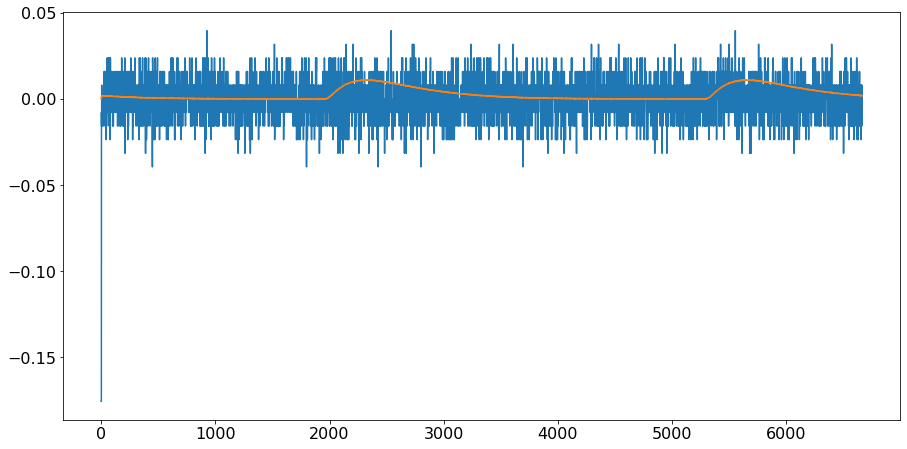

period = 3332.4479


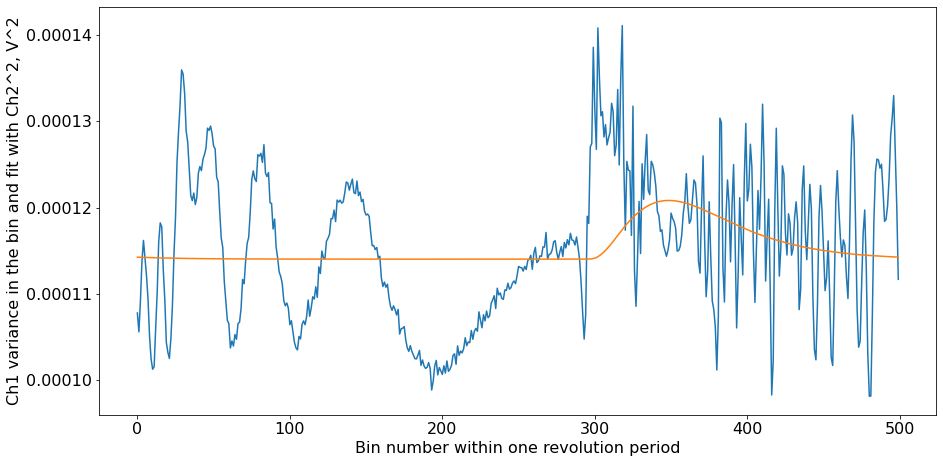

results = ch2_amplitude                1.0975
var_of_ch1_amplitude    6.79629e-06
noise_var               0.000114023
Name: 0, dtype: object
Finished working on  RefCurve_2020-03-09_11_190827.Wfm.bin (1/44)
Started working on the file  RefCurve_2020-03-09_12_190831.Wfm.bin (2/44)


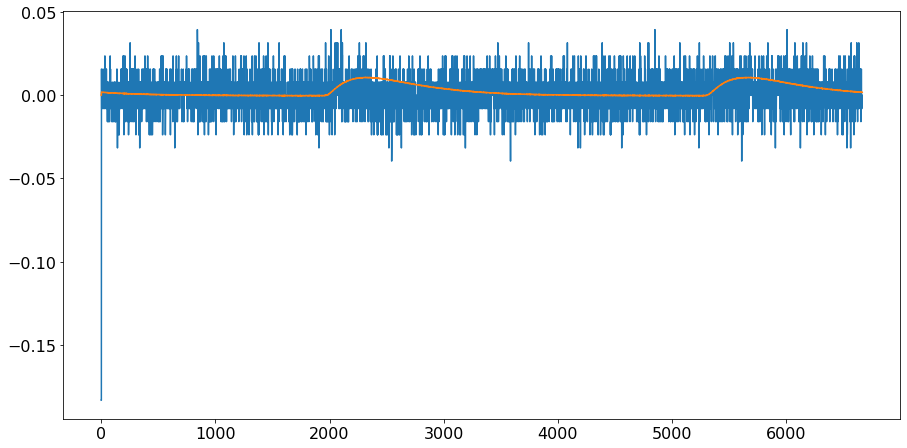

period = 3332.4478


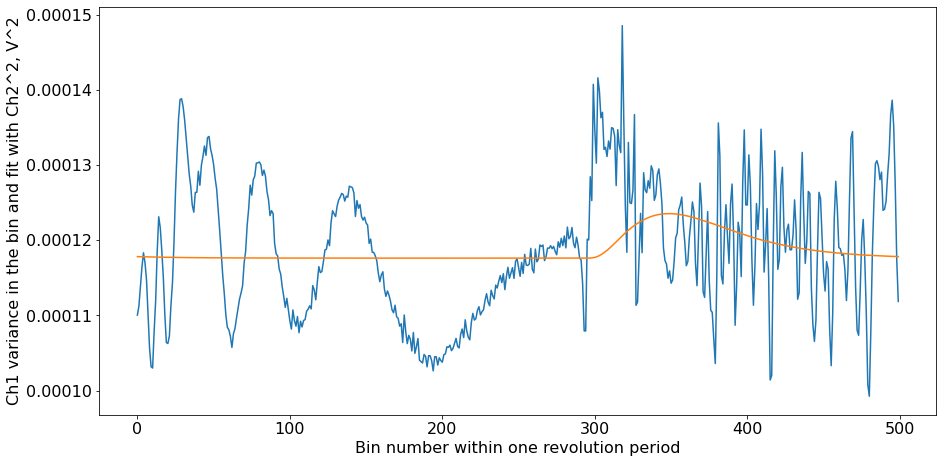

results = ch2_amplitude               1.08574
var_of_ch1_amplitude    5.92451e-06
noise_var               0.000117625
Name: 1, dtype: object
Finished working on  RefCurve_2020-03-09_12_190831.Wfm.bin (2/44)
Started working on the file  RefCurve_2020-03-09_13_190839.Wfm.bin (3/44)


KeyboardInterrupt: 

In [6]:
for i,p in enumerate(wf_paths):
    status = os.path.basename(p)+" ({}/{})".format(i+1,n_files)
    print("Started working on the file ", status)
    try:
        ch = read_waveform(p, one_channel=True)
        period = get_period(ch)
        int_period = int(period)
        ch1 = ch[:-int_period]-ch[int_period:]
        ch2 = ch[:-int_period]
        plt.plot(ch1[:3333*2])
        plt.plot(ch2[:3333*2]/100)
        plt.show()
        print("period = {:.4f}".format(period))
        res_df.iloc[i,1:] =\
            get_fluctiation_and_noise_var(ch1, ch2, period, n_bins=500, show_plots=True)
        print("results = {}".format(res_df.iloc[i,1:]))
    except Exception as e:
        print("Exception happened: ", e)
    print("Finished working on ", status)

In [7]:
# res_df["waveform_file"] = res_df["waveform_file"].astype('str')
# for i in range(1,4):
#     res_df.iloc[:,i] = res_df.iloc[:,i].astype(np.float32)

In [8]:
# res_df.to_csv(results_dir.fi("res_df_directly_connected_FLAT_03_09_2020.csv"))